<a href="https://colab.research.google.com/github/brendanpshea/database_sql/blob/main/Database_11_Data_Warehouses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Data Warehouses
### Brendan Shea, PhD

A **Data Warehouse** is a specific kind of database designed to help people like analysts, data scientists, and decision-makers get answers to complex questions. Unlike a traditional "application" database, which is geared towards handling daily transactions like adding new customer records or updating product prices, a data warehouse is optimized for digging deep into data to reveal patterns or trends. For instance, a data warehouse could help a business figure out whether sales are better in summer or winter, across multiple years and regions.

The key difference between a data warehouse and a traditional application database lies in their primary functions. A traditional database is like the cash register in a store; it's essential for day-to-day operations, keeping track of each transaction as it happens. It's designed to handle lots of quick, simple queries, like checking the price of an item or updating the quantity of a product in stock. Because it's transaction-oriented, it's structured to make these operations as fast and efficient as possible.

In contrast, a data warehouse is more like the store's back office, where managers and analysts look over sales data, inventory levels, and customer feedback to make longer-term decisions. It's structured to handle fewer queries, but these queries are much more complex and pull data from multiple sources. This is why data warehouses often use a different kind of data organization, like denormalization and Star Schema, to make these complex queries faster to run.

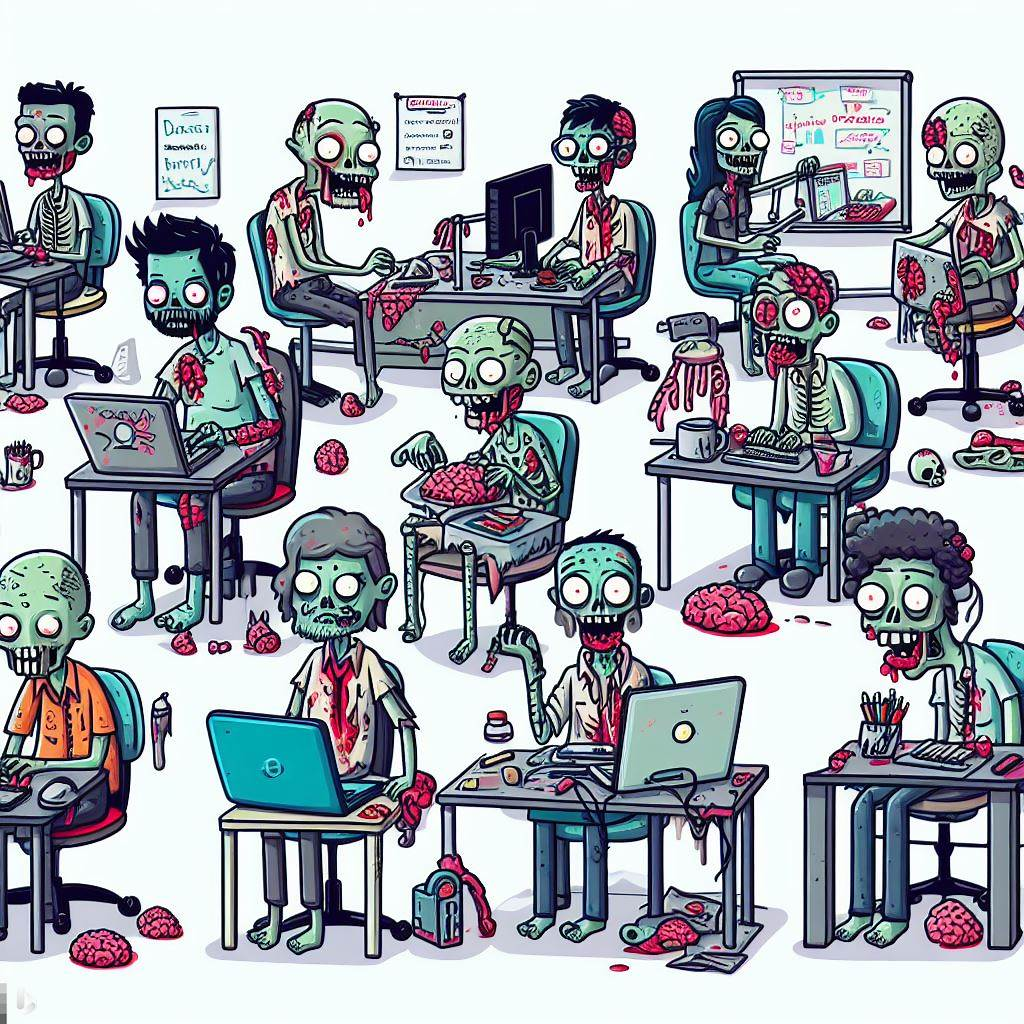

## Introduction to the Zombies! Case Study

In this case study, you find yourself in the role of a data scientist at the Center for Disease Control and Prevention (CDC), the national public health agency of the United States. Your mission is urgent and of the highest importance: a Zombie Outbreak has occurred, and it's spreading at an alarming rate. Traditional methods of containment have proven ineffective, and the situation is escalating. The CDC has been tasked with synthesizing data from a myriad of sources to develop a strategy for containment and, ultimately, eradication of this unprecedented threat.

The data you'll be working with comes from diverse origins---hospital records, military intelligence, social media feeds, satellite imagery, and more. Each data source provides a piece of the puzzle, and it's your job to assemble these pieces into a coherent and actionable picture. You'll be using Postgres as your data warehousing solution to integrate these disparate data sets.

In this context, application databases might help hospitals keep track of current patient records and immediate resource allocation. But a data warehouse would help the CDC analyze trends across *many* communities, like how the outbreak is spreading across regions, the effectiveness of various treatments over time, or how different variables like weather or population density affect the rate of infection

The stakes are high. Decisions based on your analyses will directly impact the deployment of resources, from medical supplies to military interventions. Time is of the essence, and the tools at your disposal, including the data warehouse, must be wielded with both speed and precision. This case study will guide you through the key questions and challenges you'll face in this high-pressure scenario, providing you with the technical know-how to navigate the complexities of data warehousing with Postgres in the context of a global emergency.

## Data Sources

Data Warehouses are typically constructed by pulling in data from many other sources, including (but not limited to) other databases. During a Zombie Outbreak, the CDC would likely draw from a diverse array of data sources to form a comprehensive understanding of the situation. These sources would include:

1.  *Hospital Records*  would provide real-time information on the number of infected individuals, their symptoms, and the effectiveness of treatments. This is analogous to Electronic Health Records (EHR) commonly integrated into healthcare data warehouses.

2.  *Military Intelligence* reports from units engaged with zombie containment would offer insights into the effectiveness of various strategies and the spread of the outbreak. In real-world scenarios, defense departments often maintain their own data warehouses for strategic analysis.

3.  To track large-scale movements of zombie hordes, *satellite imagery* would be invaluable. Geospatial data is often included in data warehouses for environmental and defense applications.

4.  Public sentiment and eyewitness accounts could be scraped from *social media platforms* like Twitter or Facebook. Many businesses use social media data for sentiment analysis and market research.

5.  *Traffic Cameras and CCTV* would offer ground-level visual data on zombie movements within cities. In smart cities, traffic and surveillance data are often integrated into a central data warehouse for monitoring and planning.

6.  *Weather conditions* could affect the spread of the outbreak and the effectiveness of interventions. Meteorological data is commonly used in various industries like agriculture and retail for predictive analysis.

7.  Real-time *news updates* would provide another layer of information, especially from regions where other types of data might be scarce. Media data is often used for trend analysis and is integrated into various types of data warehouses.

8.   Data from other *international or governmental organizations* like the WHO could provide a global perspective on the outbreak. In global health research, data from international organizations is often crucial.

9.  Information from *utility companies* on power outages or disruptions in water supply could indicate areas with high zombie activity. Utility data is commonly used in municipal planning and emergency response.

10. *Air Traffic Control* data about the movement of planes could help in understanding if and how the outbreak is spreading internationally. Transportation data, including air traffic, is often integrated into logistics and planning data warehouses.

Each of these data sources would contribute to a multi-dimensional view of the crisis, allowing the CDC to make informed decisions on how best to combat the outbreak.

## Extract, Transform, Load (ETL)

Imagine you're at the helm of the CDC's data operations during a Zombie Outbreak. You have a plethora of data coming in from hospital records, military intelligence, satellite imagery, and more. Each of these data sources has its own format, structure, and level of granularity. Some data might be in real-time, while others might be batch-updated every 24 hours. The challenge now is to harmonize this cacophony of data into a symphony of insights. This is the essence of the ETL process.

**Extract--** The first step is to extract the data from these various sources. Whether it's pulling in a CSV file from a military server, querying a hospital's database, or using an API to get real-time weather conditions, the extraction process is about getting access to the data.

**Transform--** Once you have the raw data, it's rarely in the perfect state for analysis. Maybe the hospital records use one format for dates, while the military intelligence uses another. Perhaps the sentiment data from social media needs to be categorized into positive, neutral, or negative. The transform step is where you clean, enrich, and otherwise prepare the data for its final destination.

**Load--** The last step is to load this now-transformed data into your data warehouse. This is where it will live, ready for querying and analysis as you make life-and-death decisions in combating the zombie apocalypse.

The ETL process is the logistical backbone that enables organizations to draw actionable insights from a sea of disparate data. Without ETL, your data warehouse is like a library without a catalog: full of information, but nearly impossible to use effectively.

To understand how this works, it will be helpful to consider a few examples:

### Example 1: Hospital Records

*Extract--*The first step would involve pulling in data from various hospitals about the number of infected individuals, their symptoms, and the effectiveness of treatments. This could be done through an API that the hospitals expose or by accessing a shared database.

*Transform--*The raw data might have inconsistencies like different units of measurement (e.g., temperature in Fahrenheit or Celsius) or varying formats for patient IDs. The transformation step would standardize these units and formats. It might also categorize symptoms into broader categories like 'mild,' 'moderate,' or 'severe' to make analysis easier.

*Load--*Finally, this cleaned and transformed data would be loaded into the CDC's data warehouse into a table specifically designed for medical records, ready for querying and analysis.

### Example 2: Military Intelligence

*Extract--*Reports from military units engaged with zombie containment would be sent in various formats: text files, PDFs, or even voice recordings. These would first be extracted and converted into a readable format.

*Transform--*The transformation step would involve parsing these different formats into structured data. For example, key information like the number of zombies encountered, the number of soldiers involved, and the geographic coordinates of the engagement would be extracted and standardized.

*Load--*This structured data would then be loaded into a separate table in the data warehouse, designed to store military intelligence. This table might have foreign key relationships with other tables, like geographic locations or time data.

### Example 3: Social Media Sentiment

*Extract--*Public sentiment and eyewitness accounts could be scraped from social media platforms like Twitter or Facebook using their respective APIs.

*Transform--*The raw social media data would likely be unstructured text. Natural Language Processing (NLP) algorithms could be applied to categorize the sentiment of each post as 'positive,' 'negative,' or 'neutral.' Geolocation data could also be extracted to determine the location of each post.

*Load--*This transformed data would be loaded into a table designed to store public sentiment. This could then be joined with other tables in the data warehouse to provide a multi-dimensional view of the public's reaction to the outbreak and the effectiveness of containment measures.

Each of these examples demonstrates how the ETL process takes raw, disparate data and turns it into a structured, queryable form that can provide invaluable insights, especially in a crisis situation like a zombie outbreak.

### Table: Common Issues in ETL
| Common Issues  | Standard Solutions |
| --- | --- |
| **Missing Values-**-For instance, some hospital records might lack temperature readings for patients. | Imputation methods can be used to fill in missing values, such as using the mean, median, or a specific constant. Alternatively, records with missing values can be excluded from certain analyses. |
| **nconsistent Formats--**Military reports might use different date formats like MM-DD-YYYY or YYYY-MM-DD. | Standardize the format during the transformation step, converting all dates to a single, consistent format. |
| **Duplicate Records--**Multiple social media posts might be scraped that are essentially the same, perhaps due to retweets or reposts. | Deduplication methods can be applied to remove or consolidate duplicate records. |
| **Data Type Mismatch--**A column expected to contain integers has some entries stored as text (e.g., 'ten' instead of 10). | Convert all entries to a consistent data type, possibly flagging or removing entries that cannot be converted. |
| **Outliers--**In a dataset of zombie sightings, one entry reports an implausibly large number of zombies. | Outliers can be truncated, transformed, or removed based on the specific requirements of the analysis. |
| **Unstructured Data--**Raw text from social media or PDF reports from military intelligence. | Text parsing and Natural Language Processing (NLP) can be used to extract structured information from unstructured data. |
| **Data Skew--**Most of the data is from one geographic location, making it unrepresentative. | Data balancing techniques can be applied, or the skew can be accounted for in the analysis phase. |
| **Temporal Issues--**Data from different time zones, leading to inconsistencies. | Convert all time data to a standard time zone, usually Coordinated Universal Time (UTC). |

## How to Structure Data Warehouses
As mentioned above, application databases primarily serve to facilitate transactional operations, which are essential for the day-to-day functioning of various applications. For instance, when a user signs up on a website, makes a purchase, or updates their profile, these actions are handled by an application database. The database is optimized for quick, real-time read and write operations. It's structured to efficiently handle a large number of simple queries that insert, update, or delete individual records. The focus is on data integrity and consistency, ensuring that all transactions are processed reliably. Here, **data normalization**  and **transaction (ACID)** support is highly important. In the context of a Zombie outbreak, for example, we might have the following application databases:

1. *Emergency Response System Database--*This database would manage real-time information related to emergency responses, such as the dispatch of medical teams, allocation of medical supplies, and tracking of emergency vehicles.
    - Normalization would be crucial to avoid redundancy and ensure data integrity. For example, if an emergency vehicle is dispatched to multiple locations, normalization would prevent the need to enter the vehicle's details multiple times, reducing the risk of errors.
    - Transactions are vital to ensure that when an emergency team is dispatched, all relevant tables are updated atomically. For instance, if a medical team is sent to a location, the database should simultaneously update the team's status to 'dispatched' and decrement the available medical teams count. Failure in any part of this transaction could lead to incorrect data, such as dispatching the same team twice.

2. *Quarantine Facility Management Database--*This database would manage the occupancy, resource allocation, and status of various quarantine facilities.
    - Normalization would help in efficiently managing resources like beds, medical supplies, and personnel. By keeping these details in separate but linked tables, the database can ensure that any changes to resource availability are consistently reflected across all relevant records.

    - When admitting a new patient to a quarantine facility, multiple tables like 'Available Beds,' 'Patient Records,' and 'Medical Supplies' would need to be updated. Transactions ensure that these updates are atomic, maintaining data consistency. For example, admitting a patient should only be successful if a bed is available and medical supplies are sufficient.

In each of these examples, normalization ensures data integrity and minimizes redundancy, while transactions ensure that all database operations are atomic and consistent, which is crucial for the real-time, high-stakes environment of a Zombie Outbreak.


### Why Warehouses are Different

Data warehouses, on the other hand, are built for a different purpose: they are optimized for analytical processing. Unlike application databases, which are concerned with individual transactions, data warehouses are designed to handle complex queries that may involve aggregating or comparing large sets of data. These queries are often read-heavy and require scanning multiple tables to generate reports, identify trends, or make forecasts. The primary goal is to enable fast, efficient data retrieval for analysis, often at the expense of quick data modification capabilities.

The differing purposes of application databases and data warehouses have significant implications for how they are structured. In an application database, the schema is usually normalized to minimize data redundancy. This makes it easier to maintain data integrity but can make complex queries slower because they may require data to be gathered from multiple tables.

In contrast, a data warehouse often employs **denormalized schemas** , like the Star Schema or Snowflake Schema, to speed up query performance. Denormalization involves storing redundant data to reduce the need for complex joins during queries, thereby making data retrieval faster. In our Zombie Outbreak scenario, for example, a denormalized schema might store each patient's full information alongside each medical record, rather than storing it in a separate table. This would make it quicker to generate comprehensive reports on patient statuses.

Additionally, data warehouses often use specialized indexing and partitioning strategies to further optimize query performance. Materialized views, which store the results of complex queries for quick retrieval, are another common feature in data warehouses but are rarely used in application databases.

In summary, the structure of your data repository---be it an application database or a data warehouse---will be heavily influenced by its primary function. Understanding these functions and their implications is crucial when designing a system, especially one that needs to handle the complexities and urgencies of a situation like a Zombie Outbreak.

### Structuring the Data Warehouse: The Role of Denormalization

In contrast to application databases, where normalization is often a priority, data warehouses commonly employ Denormalization as a strategy to improve query performance. Denormalization involves combining tables in a way that makes data retrieval more straightforward and faster, even if it means introducing some level of data redundancy. For example, we might choose to (intentionally) keep our tables in 1NF, rather than 3NF.

#### What is Denormalization?

Denormalization is the process of consolidating multiple tables into fewer tables, often by including redundant data. For example, instead of having a separate table for 'Patient Information' and another for 'Medical Records,' a denormalized table might include columns from both original tables. This reduces the need for complex joins when querying, thereby speeding up data retrieval.

#### Why Denormalization?

1.  By reducing the need for joins, denormalization makes queries run faster. This is crucial in a high-stakes, time-sensitive scenario like a Zombie Outbreak, where quick data analysis can be a matter of life and death.

2.  Denormalization often results in tables that are easier to query because all the data needed for a particular analysis is stored together. This is particularly useful for less technical users who may need to query the data but are not familiar with complex SQL joins.

3.  Data warehouses are primarily used for read-heavy operations like data analysis and reporting. Denormalization is aligned with this purpose, as it optimizes for fast read operations at the expense of making write operations more complex due to the redundancy.

#### Considerations

While denormalization has its advantages, it's not without trade-offs:

1.  Storing redundant data increases the risk of inconsistencies. For example, if a patient's address is stored in multiple places, an update to one may not automatically reflect in the others.

2.  Redundant data means you'll need more storage space, which could increase costs.

3.  Because the same piece of data might exist in multiple places, write and update operations can become more complex and time-consuming.

In the context of a Zombie Outbreak, the data warehouse might include denormalized tables that combine patient information with medical records, or military unit details with their activity logs. This would enable quicker generation of comprehensive reports, whether it's to analyze the effectiveness of a treatment or to strategize the deployment of military units.

### Using the Star Schema for Data Warehouses

After discussing denormalization, which is about keeping related data together to make it easier to manage, we're now going to explore a specific way to organize this data: the **Star Schema**.

Imagine you're part of a team that's trying to understand a zombie outbreak. You need to know where the zombies are appearing, when they're most active, and how effective your team's response has been. You could keep all this information in one massive table, but that would be overwhelming and inefficient.

The Star Schema helps by organizing this data into a central table and several related tables. This makes it easier to find the specific information you need, much like how a well-organized filing cabinet lets you quickly locate important documents.

In the Star Schema, the **fact table** is the central table that contains the primary information you're interested in. In our zombie example, this would be the `ZombieEncounters` table. This table holds key metrics like the number of zombies encountered (`NumberOfZombies`) and the number of civilians involved (`CiviliansInvolved`).

Then, we have **dimension tables** that provide additional context for each of these encounters. For instance, the `Time` table gives us detailed information about when each encounter occurred, including the date, hour, minute, and second. The `Location` table tells us where the encounter happened, specifying the city, state, and even geographical coordinates like latitude and longitude. The `ResponseTeam` table provides information about the team that responded to the encounter, such as the team's name, size, and any special equipment they used.

A closely related scheme (often used for data warehouses) is called the **Snowflake Schema**, which allows for the dimensions tables to link to "subdimension" tables (and so, it has more "branching" than a Star Schema table, but is still less normalized than a standard applicaiton datababase).

## A STAR-ry ERD
The STAR schema is named because it appears (roughly) as a "star" with the center being the "fact" table and the points being the "dimensions" tables.

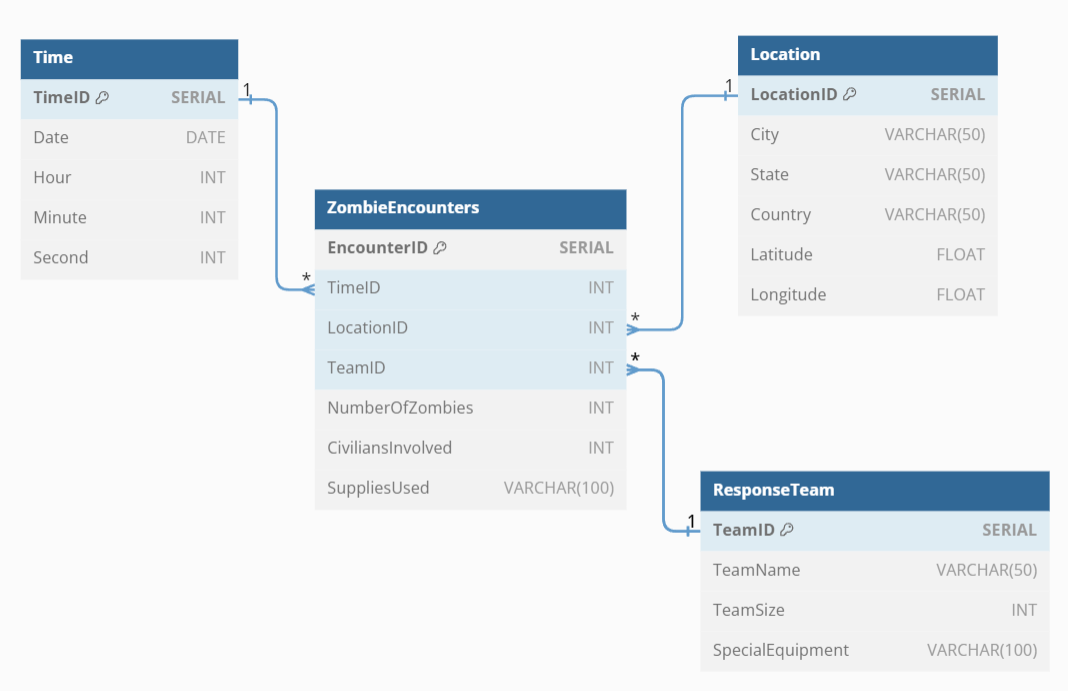

## Questions: Data Warehousing
1. Why do you think organizations use data warehouses instead of just sticking with traditional databases? Discuss the key differences between the two and the advantages of using a data warehouse for analytical tasks.

2. Explain the ETL (Extract, Transform, Load) process in your own words. Why is each step important, and what could go wrong if one of these steps is not performed correctly?

3. The Star Schema is a popular way to structure a data warehouse. Can you think of a real-world scenario, other than the Zombie Outbreak, where a Star Schema would be useful? What would be the fact table, and what would be the dimension tables?

4. Discuss the concept of denormalization in data warehouses. Why might denormalization be beneficial for a data warehouse but not for a transactional database? Can you think of any downsides to denormalization?


5. In our Zombie Outbreak example, the Time table is one of the dimensions. Why do you think time is often included as a dimension in data warehouses? Can you think of any analytical questions that could be answered by including time as a dimension?

## Answers: Data Warehouses
1.

2.

3.

4.

#### STAR in SQL
In the following SQL code, we're creating these tables using the `CREATE TABLE` command. When we specify `PRIMARY KEY`, we're creating a unique identifier for each record in that table. This is like having a unique code for each document in a filing cabinet, making it easier to find later. The `REFERENCES` keyword establishes a link between the central fact table and the dimension tables. This tells the database how these tables are connected, so we can easily pull information from multiple tables when we need to.

By organizing our data this way, the Star Schema makes it easier to perform complex queries and analyses. It allows us to quickly find answers to important questions, like identifying the times and locations with the most zombie activity, or evaluating the effectiveness of different response teams.

In [1]:
# Load Postgres
!apt install postgresql postgresql-contrib &>log
!service postgresql start
!sudo -u postgres psql -c "CREATE USER root WITH SUPERUSER"
# set connection
%load_ext sql
%sql postgresql+psycopg2://@/postgres

 * Starting PostgreSQL 14 database server
   ...done.
CREATE ROLE


In [2]:
%%sql
-- Create the Time dimension table
DROP TABLE IF EXISTS Time CASCADE;
CREATE TABLE Time (
    TimeID SERIAL PRIMARY KEY,
    Date DATE,
    Hour INT,
    Minute INT,
    Second INT
);

 * postgresql+psycopg2://@/postgres
Done.
Done.


[]

In [3]:
%%sql
DROP TABLE IF EXISTS Location CASCADE;
-- Create the Location dimension table
CREATE TABLE Location (
    LocationID SERIAL PRIMARY KEY,
    City VARCHAR(50),
    State VARCHAR(50),
    Country VARCHAR(50),
    Latitude FLOAT,
    Longitude FLOAT
);

 * postgresql+psycopg2://@/postgres
Done.
Done.


[]

In [4]:
%%sql
DROP TABLE IF EXISTS ResponseTeam CASCADE;
-- Create the ResponseTeam dimension table
CREATE TABLE ResponseTeam (
    TeamID SERIAL PRIMARY KEY,
    TeamName VARCHAR(50),
    TeamSize INT,
    SpecialEquipment VARCHAR(100)
);

 * postgresql+psycopg2://@/postgres
Done.
Done.


[]

In [5]:
%%sql
DROP TABLE IF EXISTS ZombieEncounters CASCADE;
-- Create the central fact table: ZombieEncounters
CREATE TABLE ZombieEncounters (
    EncounterID SERIAL PRIMARY KEY,
    TimeID INT REFERENCES Time(TimeID),
    LocationID INT REFERENCES Location(LocationID),
    TeamID INT REFERENCES ResponseTeam(TeamID),
    NumberOfZombies INT,
    CiviliansInvolved INT,
    SuppliesUsed VARCHAR(100)
);


 * postgresql+psycopg2://@/postgres
Done.
Done.


[]

### Inserting Sample Zombie Data
Now, let's insert some sample Zombie data, so that we can test out our data warehouse. We will insert 1,000 random Zombie encounters using **Procedural Langugage for SQL (PL/SQL)**, an extension of SQL that gives relational databases the power to do things more like Python or Java. (Note: PL/SQL is *NOT* standardized by ANSI SQL, and so details of its implementation vary widely).

The details of PL/SQL are beyond the scope of this class. However, for database professionals, it can provide a powerful tool.

In [6]:
%%sql
--Delete existing data
DELETE FROM ZombieEncounters CASCADE;
DELETE FROM Location CASCADE;


-- Insert major world cities into the Location table
INSERT INTO Location (LocationID, City, State, Country, Latitude, Longitude) VALUES
(1, 'New York', 'New York', 'USA', 40.7128, -74.0060),
(2, 'London', 'England', 'UK', 51.5074, -0.1278),
(3, 'Tokyo', 'Tokyo', 'Japan', 35.6895, 139.6917),
(4, 'Paris', 'Ile-de-France', 'France', 48.8566, 2.3522),
(5, 'Sydney', 'New South Wales', 'Australia', -33.8688, 151.2093);

-- Insert response teams using a DO block with a loop
DO $$
DECLARE
    team_name TEXT;
BEGIN
    -- Loop to create 10 response teams
    FOR i IN 1..10 LOOP
        team_name := 'Team ' || i; -- Concatenating 'Team ' with the loop index
        INSERT INTO ResponseTeam (TeamName, TeamSize, SpecialEquipment) VALUES
        (team_name, (RANDOM() * 10 + 5)::INT, 'Standard Kit'); -- Random team size between 5 and 15
    END LOOP;
END $$;

-- Insert random encounters using another DO block
DO $$
DECLARE
    encounter_date DATE;
    encounter_hour INT;
    encounter_minute INT;
    encounter_second INT;
    location_id INT;
    team_id INT;
    num_zombies INT;
    zombie_constant FLOAT;
BEGIN
    -- Loop to create 1000 random encounters
    FOR i IN 1..1000 LOOP
        -- Generate a random date within 6 months of Halloween 2033
        encounter_date := '2033-10-31'::DATE + (RANDOM() * 180)::INT;
        encounter_hour := (RANDOM() * 24)::INT;
        encounter_minute := (RANDOM() * 60)::INT;
        encounter_second := (RANDOM() * 60)::INT;

        -- Randomly assign a location and a team
        location_id := TRUNC(RANDOM() * 5) + 1; -- LocationIDs assumed to be 1 to 5
        team_id := TRUNC(RANDOM() * 10) + 1; -- TeamIDs assumed to be 1 to 10


        -- Assign a zombie constant based on the city
        -- Reflects the fact Zombies are more common certain places than others
        CASE location_id
            WHEN 1 THEN zombie_constant := 4; -- New York
            WHEN 2 THEN zombie_constant := 2; -- London
            WHEN 3 THEN zombie_constant := 5; -- Tokyo
            WHEN 4 THEN zombie_constant := 3; -- Paris
            WHEN 5 THEN zombie_constant := 1; -- Sydney
            ELSE zombie_constant := 1.0;
        END CASE;

        -- Calculate the number of zombies based on the zombie constant
        num_zombies := ((RANDOM() + 1) * 10 * zombie_constant)::INT;

        -- Insert the date and time of the encounter into the Time table
        INSERT INTO Time (Date, Hour, Minute, Second) VALUES
        (encounter_date, encounter_hour, encounter_minute, encounter_second);

        -- Insert the encounter details into the ZombieEncounters table
        -- currval('time_timeid_seq') fetches the last inserted TimeID
        INSERT INTO ZombieEncounters (TimeID, LocationID, TeamID, NumberOfZombies, CiviliansInvolved, SuppliesUsed) VALUES
        (currval('time_timeid_seq'), location_id, team_id, num_zombies, (RANDOM() * 50 * zombie_constant)::INT, 'Standard Supplies');
    END LOOP;
END $$;


 * postgresql+psycopg2://@/postgres
0 rows affected.
0 rows affected.
5 rows affected.
Done.
Done.


[]

In this script:

1. The `DO` blocks are used for running procedural code. They allow us to execute more complex operations like loops.
2. Inside the `DO` blocks, **variables** are declared for use within the loop.
3. The `RANDOM()` function is used to generate random numbers for various attributes like team size, encounter dates, and number of zombies.
4. `FOR` loops are used to insert multiple entries (response teams and encounters).
5. The `CASE` statement assigns different zombie constants based on the city.
6. The `INSERT INTO` statements add data to the respective tables.
7. `currval('sequence_name')` is used to fetch the last value from a sequence, useful for getting the latest `TimeID`.

## Exercises

1.  Select All Records from `ZombieEncounters` Table.  Hint: Use the `SELECT` statement to retrieve all columns.
2.  Count the Total Number of Zombie Encounters. Hint: Use the `COUNT` function on the `EncounterID` column.
3.  Find the Average Number of Zombies Encountered. Hint: Use the `AVG` function on the `NumberOfZombies` column.
4.  List All Unique Response Teams. Hint: Use the `DISTINCT` keyword on the `TeamID` column in the `ZombieEncounters` table.
5.  Find the Total Number of Civilians Involved in New York.   Hint: Use the `SUM` function and a `JOIN` with the `Location` table to filter by city.


In [ ]:
%%sql
-- Ex 1

In [ ]:
%%sql
-- Ex 2

In [ ]:
%%sql
-- Ex 3

In [ ]:
%%sql
-- Ex 4

In [ ]:
%%sql
-- Ex 5


6.  Retrieve Encounters that Involved More Than 50 Zombies.  Hint: Use the `WHERE` clause to filter records based on the `NumberOfZombies` column.
7.  Find the Earliest and Latest Time of Encounters. Hint: Use the `MIN` and `MAX` functions on the `Date` column in the `Time` table.
8.  List Encounters Sorted by Number of Zombies in Descending Order.  Hint: Use the `ORDER BY` clause on the `NumberOfZombies` column.
9.  Find the Total Number of Zombies Encountered by Each Team.   Hint: Use the `GROUP BY` clause on the `TeamID` and the `SUM` function on `NumberOfZombies`.
10. Retrieve All Encounters in London on Halloween (Oct 31).    Hint: Use a `JOIN` with the `Location` and `Time` tables and filter using the `WHERE` clause.

In [ ]:
%%sql
-- Ex 6

In [ ]:
%%sql
-- Ex 7

In [ ]:
%%sql
-- Ex 8

In [ ]:
%%sql
-- Ex 9

In [ ]:
%%sql
-- Ex 10

## Introduction to Data Mining and Data Analytics

Data mining and data analytics are akin to the reconnaissance and strategy formulation in a zombie crisis management. **Data mining** is the process of sifting through massive datasets to identify patterns, anomalies, and correlations. It's like scouting the landscape in our zombie scenario: identifying where the outbreaks are most severe, understanding how the virus spreads, and pinpointing potential safe zones.

**Data analytics**, on the other hand, takes this information and turns it into actionable insights. It's the strategic planning stage where we use the data gathered to make informed decisions, such as where to allocate resources, how to effectively deploy response teams, and what preventive measures to implement to contain the outbreak.

In this section, we'll take a look at a few of the capacities provided ny **Python Pandas**. This is a software library for the Python programming languae designed for data manipulation and analysis. It offers data structures and operations for manipulating numerical tables and time series, making it a versatile tool for both data mining and analytics.

In the context of our zombie epidemic case study, learning (a little) Python Pandas will empower you to handle real-world data challenges. You'll learn how to clean and organize data from various sources, such as hospital records, government alerts, and survivor accounts. You'll also discover how to analyze this data to uncover trends, such as the rate of spread of the infection, the effectiveness of containment measures, and the impact of the outbreak on different regions.


## Python Pandas: Understanding and Utilizing DataFrames with PostgreSQL

Python Pandas is a library that offers data structures and tools for effective data manipulation and analysis, making it a staple in the world of data science. Understanding how Pandas DataFrames work, and how they differ from database tables, is crucial for students delving into data analysis.

A **DataFrame** in Pandas is a two-dimensional, size-mutable, and potentially heterogeneous tabular data structure with labeled axes (rows and columns). It's similar to a spreadsheet or a SQL table but with more flexibility and functionality for data manipulation and analysis. Unlike a database table, which is designed for efficient storage and retrieval of data, a DataFrame is optimized for data exploration and transformation. DataFrames allow for easy data cleaning, preparation, and analysis, all in-memory, which means operations can be done without affecting the database.

In a Jupyter Notebook, you can use the `%sql` magic command to execute SQL queries against a PostgreSQL database and store the results in a Pandas DataFrame. This approach is particularly useful for creating DataFrames from complex queries, like joins across multiple tables.

Let's say we want to create a DataFrame that combines information from the `ZombieEncounters` and `Location` tables. We can achieve this with a SQL join:

In [7]:
%%sql encounters_location_df <<
SELECT z.EncounterID, z.NumberOfZombies, z.CiviliansInvolved, l.City, l.Country
FROM ZombieEncounters z
JOIN Location l ON z.LocationID = l.LocationID

 * postgresql+psycopg2://@/postgres
1000 rows affected.
Returning data to local variable encounters_location_df


Here, `<<` is used to direct the output of the SQL query into the `encounters_location_df` variable. The `%%sql` magic command allows for multi-line SQL queries in a Jupyter Notebook cell. Now, we'll cast this to a Pandas dataframe:

In [8]:
import pandas as pd #Load Pandas
encounters_location_df = pd.DataFrame(encounters_location_df)

### Exploring the DataFrame

Once the DataFrame is created, you can perform various operations to understand your data better:

#### Viewing Data with `head()`
The `head()` method displays the first few rows of the DataFrame:

In [9]:
encounters_location_df.head()

,encounterid,numberofzombies,civiliansinvolved,city,country
0,1,35,68,London,UK
1,2,73,182,Tokyo,Japan
2,3,26,66,London,UK
3,4,73,130,New York,USA
4,5,48,26,Paris,France


### `info()
The info() method provides a concise summary of the DataFrame, including the number of non-null entries and data types:

In [10]:
encounters_location_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   encounterid        1000 non-null   int64 
 1   numberofzombies    1000 non-null   int64 
 2   civiliansinvolved  1000 non-null   int64 
 3   city               1000 non-null   object
 4   country            1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


#### Accessing Specific Columns

You can access specific columns using their names. For example, to see all the cities in the DataFrame:

In [11]:
encounters_location_df['city']

0        London
1         Tokyo
2        London
3      New York
4         Paris
         ...   
995      Sydney
996       Tokyo
997       Paris
998      London
999       Paris
Name: city, Length: 1000, dtype: object

#### Filtering Data

DataFrames can be filtered using conditions. For instance, to find encounters in a specific country:

In [12]:
encounters_in_usa = encounters_location_df[encounters_location_df['country'] == 'USA']
encounters_in_usa

,encounterid,numberofzombies,civiliansinvolved,city,country
3,4,73,130,New York,USA
9,10,74,196,New York,USA
11,12,68,123,New York,USA
14,15,64,188,New York,USA
18,19,71,49,New York,USA
...,...,...,...,...,...
968,969,68,59,New York,USA
975,976,74,121,New York,USA
976,977,63,57,New York,USA
978,979,54,188,New York,USA


Understanding and utilizing Pandas DataFrames, especially in conjunction with SQL queries, provides a powerful toolkit for data analysis. By combining data from multiple tables into a single DataFrame, students can perform a wide range of data manipulations and analyses, all within the flexible and intuitive environment of Python Pandas. This approach is not only efficient but also highly effective in teaching the fundamentals of data exploration and analysis.

## Table: Basic Pandas Operations
| Pandas Operation Syntax | Description |
| --- | --- |
| `df.head(n)` | Displays the first `n` rows of the DataFrame `df`. If `n` is not specified, it defaults to 5. |
| `df.info()` | Provides a concise summary of the DataFrame `df`, including the number of non-null entries, data types of columns, and memory usage. |
| `df.describe()` | Generates descriptive statistics that summarize the central tendency, dispersion, and shape of the DataFrame's numerical columns. |
| `df['ColumnName']` | Accesses a specific column 'ColumnName' from the DataFrame `df`. |
| `df[['Col1', 'Col2']]` | Selects multiple columns 'Col1' and 'Col2' from the DataFrame `df`. |
| `df.iloc[row, column]` | Selects data by row and column numbers. For example, `df.iloc[0, 1]` gets the data in the first row and second column. |
| `df[column].value_counts()` | Returns a Series containing counts of unique values in the specified column. Useful for categorical data. |
| `df.isnull()` | Detects missing values in the DataFrame, returning a boolean mask where `True` indicates missing data. |
| `df.dropna()` | Removes missing values from the DataFrame. |
| `df.sort_values(by='Column')` | Sorts the DataFrame by the values in a specific column 'Column'. |
| `df.groupby('Column')` | Groups the DataFrame using the values in the specified column 'Column', often used with aggregate functions (like sum, mean). |

## Constructing Basic Visualizations with Pandas

Visualizations play a crucial role in data analysis. They provide a clear and intuitive way to see trends, outliers, and patterns in data that might be missed in raw numerical analysis. Good visualizations can make complex data more accessible, understandable, and actionable.

General best practices for visualizations include:
1. The primary goal is to convey information clearly. Avoid cluttering your visualizations with unnecessary elements.
2. Choose the type of visualization that best represents the nature of your data and the story you want to tell.
3. Properly label your axes, titles, and data points when necessary. This helps in making the visualization self-explanatory.
4. Use colors sensibly to enhance readability. Be mindful of colorblind-friendly palettes.
5. Maintain consistency in style, colors, and fonts across multiple visualizations for coherence.

Pandas (because of its integration with the Python library Matplotlib) provides a wide range of plotting capabilities. We'll focus on three common types: histograms, scatter plots, and box plots.

### Histograms
Histograms are great for visualizing the distribution of a single numerical variable. They show the frequency of data points within specified ranges.

The following will create a histogram of the `numberofzombies` column, showing how frequently different encounter sizes occur.

<Axes: title={'center': 'Zombie Encounter Frequency'}, ylabel='Frequency'>

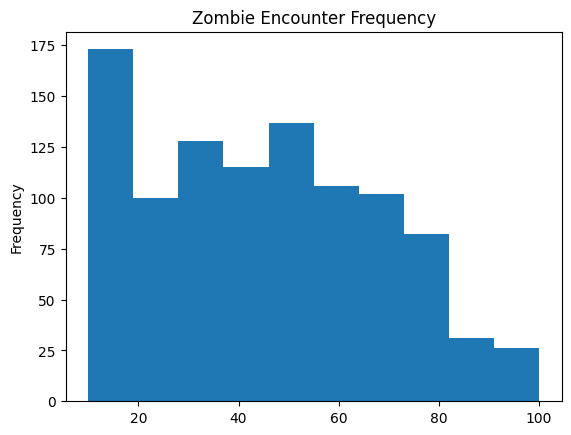

In [13]:
# Create a histogram
encounters_location_df['numberofzombies'].plot(
    kind='hist',
    title='Zombie Encounter Frequency'
    )


### Scatter Plots
Scatter plots are useful for examining the relationship between two numerical variables. Here, each point represents an encounter, plotting the number of zombies against the number of civilians involved.

<Axes: title={'center': 'Zombies vs. Civilians Involved'}, xlabel='numberofzombies', ylabel='civiliansinvolved'>

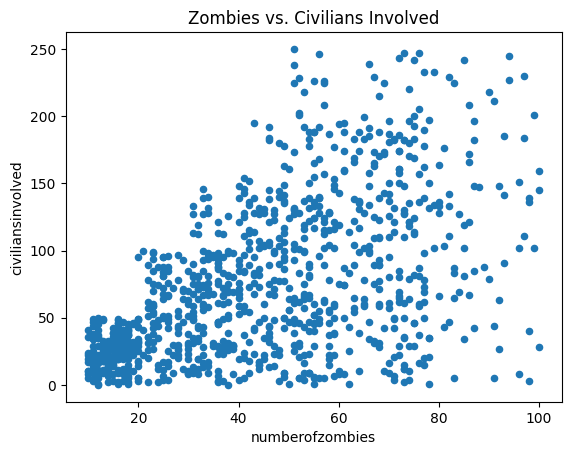

In [14]:
# Plotting a scatter plot between 'NumberOfZombies' and 'CiviliansInvolved'
encounters_location_df.plot(kind='scatter',
        x='numberofzombies',
        y='civiliansinvolved',
        title='Zombies vs. Civilians Involved')


## Box Plots

Box plots (or box-and-whisker plots) are used to show the distribution of a dataset and identify outliers.

<Axes: title={'center': 'numberofzombies'}, xlabel='city'>

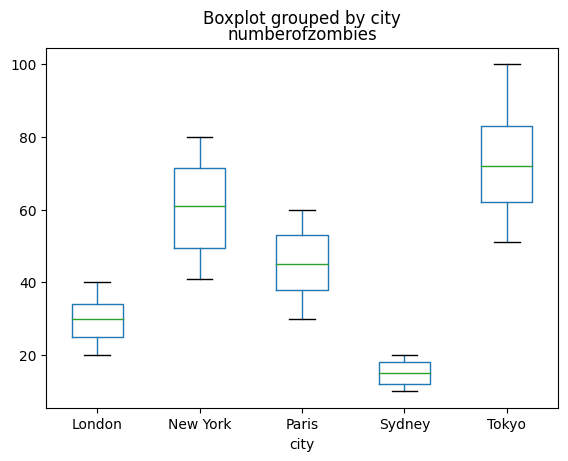

In [15]:
# Creating a box plot for 'NumberOfZombies'
encounters_location_df.boxplot(
    column='numberofzombies',
    by='city',
    grid=False)

## Table: Basic Visualizations With Pandas
| Pandas Code | Description |
| --- | --- |
| `df.plot(kind='line')` | Pandas code to create a line plot of the dataframe `df`. |
| `df.plot(x='col1', y='col2', kind='scatter')` | Pandas code to generate a scatter plot using 'col1' for the x-axis and 'col2' for the y-axis in dataframe `df`. |
| `df['column'].plot(kind='hist')` | Pandas code to create a histogram of the 'column' in dataframe `df`. |
| `df.plot(kind='bar')` | Pandas code to make a bar plot of the dataframe `df`. |
| `df.plot(kind='barh')` | Pandas code to create a horizontal bar plot of the dataframe `df`. |
| `df.plot(kind='box')` | Pandas code to generate a box plot of the dataframe `df`. |
| `df.plot(kind='area')` | Pandas code to create an area plot of the dataframe `df`. |
| `df.plot(kind='pie', y='column')` | Pandas code to make a pie chart of the 'column' in dataframe `df`. |


## Questions

1. What do the above diagrams tell us about the nature of Zombie attacks?

2. What are some ways you might improve these diagrams to be more informative? (CHALLENGE/OPTIONAL: Figure out how to do this in Pandas).

3. What other sorts of visualizations might be helpful?


### My Answers
1.

2.


3.

## Challenge/Optional
Create a new visualization of the Zombie data. Then describe what we can learn from it.

## Review With Quizlet
Click the following cell to launch the quizlet review for this chapter.

In [ ]:
%%html
<iframe src="https://quizlet.com/853694689/learn/embed?i=psvlh&x=1jj1" height="500" width="100%" style="border:0"></iframe>

## Glossary
| Term | Definition |
| --- | --- |
| Data Warehouse | A large system for storing and managing data from different sources, used for analysis and reporting. |
| Star Schema | A database structure that organizes data into one central table linked to several related tables. It simplifies complex data relationships, making it easier to analyze data. |
| Denormalization | A process in databases where data from multiple tables is combined into one to improve read performance, at the cost of making updates more complex. |
| Fact Table | A table in a data warehouse that stores the main pieces of information, like sales or transactions, and is linked to other tables that provide additional details. |
| Dimension Table | Tables in a data warehouse that provide descriptive information about the facts in the fact table, like details about customers, products, or time periods. |
| Snowflake Schema | A more complex database structure where the dimension tables of a star schema are further divided into additional tables, reducing data redundancy but increasing complexity. |
| Pandas | A software library in Python used for data manipulation and analysis, providing data structures and operations for manipulating numerical tables and time series. |
| Data Frame | A table-like data structure used in programming for organizing data into rows and columns, making it easier to manipulate and analyze large datasets. |
| Histogram | A graphical representation that shows the frequency distribution of a dataset. It groups data into bins and displays the number of data points that fall into each bin. |
| Scatter Plot | A type of graph used to display values for two variables for a set of data. It shows data points on a two-dimensional grid, helping to identify relationships between variables. |
| Box Plot | A graphical representation that shows the distribution of data based on a five-number summary: minimum, first quartile, median, third quartile, and maximum. It is useful for identifying outliers and data spread. |